In [1]:
import pandas as pd
import datetime
import numpy as np
import time
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor



In [2]:
train_set = pd.read_csv('USD-JPY train set.csv',parse_dates = True)#import the prepared file.
pd.options.mode.chained_assignment = None # no important

In [3]:
#A function to encode the time into seconds of a day
def time_encode(x):
    x = time.strptime(x.split(',')[0],'%H:%M:%S')
    y = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

    return y
train_set['Numeric time'] = train_set['time'].apply(lambda x: time_encode(x))
train_set['Numeric time' ]

0       30600.0
1       81000.0
2       51300.0
3       30600.0
4       30600.0
         ...   
1195    50400.0
1196    30600.0
1197    30600.0
1198    79200.0
1199    66600.0
Name: Numeric time, Length: 1200, dtype: float64

In [4]:
train_set['strength'][97] = np.nan # Some unexpecting columns filled with "nan"
train_set['strength'][98] = np.nan 

In [5]:
train_set['strength']  = pd.to_numeric(train_set['strength']) # convert strength to numeric
train_set['strength']= train_set['strength'].fillna(method = 'bfill') #filling 'nan' values by using back fill method
train_set['strength'].isnull().sum() #checking null values
train_set

,DATE_TIME,HIGH,LOW,OPEN,CLOSE,Event_value,Event_type,Time duration,Trend,Boundaries,strength,time,Numeric time
0,2011-01-13 8:30:00,82.841,82.728,82.732,82.818,1.10,USD_PPI,Short term,RANGE,0.01290,0.041149,8:30:00,30600.0
1,2011-01-24 22:30:00,82.483,82.437,82.483,82.445,0.10,JPY_IR,Long term,RANGE,0.01085,0.045159,22:30:00,81000.0
2,2011-01-26 14:15:00,82.425,82.323,82.388,82.326,0.25,USD_IR,Short term,RANGE,0.04680,0.067677,14:15:00,51300.0
3,2011-01-28 8:30:00,82.387,82.298,82.385,82.298,3.20,USD_GDP,Short term,RANGE,0.01700,0.053575,8:30:00,30600.0
4,2011-02-15 8:30:00,83.843,83.773,83.781,83.788,0.30,USD_RETAIL,Long term,UP,0.00990,0.044591,8:30:00,30600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2019-12-11 14:00:00,108.769,108.615,108.681,108.621,1.75,USD_IR,Long term,DOWN,0.01555,-0.043318,14:00:00,50400.0
1196,2019-12-12 8:30:00,108.617,108.558,108.617,108.597,0.00,USD_PPI,Long term,UP,0.01555,0.048136,8:30:00,30600.0
1197,2019-12-13 8:30:00,109.622,109.493,109.544,109.585,0.20,USD_RETAIL,Short term,DOWN,0.01555,-0.058409,8:30:00,30600.0
1198,2019-12-18 22:00:00,109.585,109.559,109.572,109.562,-0.10,JPY_IR,Long term,RANGE,0.00635,0.045159,22:00:00,79200.0


In [6]:
train_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE_TIME      1200 non-null   object 
 1   HIGH           1200 non-null   float64
 2   LOW            1200 non-null   float64
 3   OPEN           1200 non-null   float64
 4   CLOSE          1200 non-null   float64
 5   Event_value    1200 non-null   float64
 6   Event_type     1200 non-null   object 
 7   Time duration  1200 non-null   object 
 8   Trend          1200 non-null   object 
 9   Boundaries     1200 non-null   float64
 10  strength       1200 non-null   float64
 11  time           1200 non-null   object 
 12  Numeric time   1200 non-null   float64
dtypes: float64(8), object(5)
memory usage: 122.0+ KB


In [7]:
train_set.describe() #Aggrigation behaviour of the features


,HIGH,LOW,OPEN,CLOSE,Event_value,Boundaries,strength,Numeric time
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,103.420476,103.278052,103.347713,103.348914,0.931125,0.020102,0.012262,39268.500000
std,13.282351,13.268723,13.272584,13.275753,1.245131,0.018747,0.060178,21008.045826
min,75.776000,75.662000,75.770000,75.685000,-2.900000,0.004250,-0.328727,0.000000
25%,98.570000,98.250000,98.367000,98.384000,0.100000,0.011200,-0.040023,27000.000000
50%,108.231000,108.146000,108.229000,108.180000,0.300000,0.015100,0.034474,30600.000000
75%,111.996000,111.880000,111.880000,111.914000,1.525000,0.022412,0.053575,50400.000000
max,124.513000,124.432000,124.490000,124.444000,5.000000,0.244750,0.251545,85500.000000


In [8]:
train_set.corr() #checking colleration features

,HIGH,LOW,OPEN,CLOSE,Event_value,Boundaries,strength,Numeric time
HIGH,1.000000,0.999939,0.999969,0.999976,-0.001920,0.107689,0.048522,-0.073675
LOW,0.999939,1.000000,0.999969,0.999972,-0.000768,0.105135,0.049353,-0.073016
OPEN,0.999969,0.999969,1.000000,0.999961,-0.001475,0.106043,0.048222,-0.073402
CLOSE,0.999976,0.999972,0.999961,1.000000,-0.001363,0.106357,0.048827,-0.073262
Event_value,-0.001920,-0.000768,-0.001475,-0.001363,1.000000,-0.068127,-0.052023,0.123082
Boundaries,0.107689,0.105135,0.106043,0.106357,-0.068127,1.000000,0.157220,-0.062087
strength,0.048522,0.049353,0.048222,0.048827,-0.052023,0.157220,1.000000,-0.008259
Numeric time,-0.073675,-0.073016,-0.073402,-0.073262,0.123082,-0.062087,-0.008259,1.000000


AxesSubplot(0.125,0.1925;0.62x0.62)


,HIGH,Event_value,Numeric time
0,82.841,1.10,30600.0
1,82.483,0.10,81000.0
2,82.425,0.25,51300.0
3,82.387,3.20,30600.0
4,83.843,0.30,30600.0
...,...,...,...
1195,108.769,1.75,50400.0
1196,108.617,0.00,30600.0
1197,109.622,0.20,30600.0
1198,109.585,-0.10,79200.0


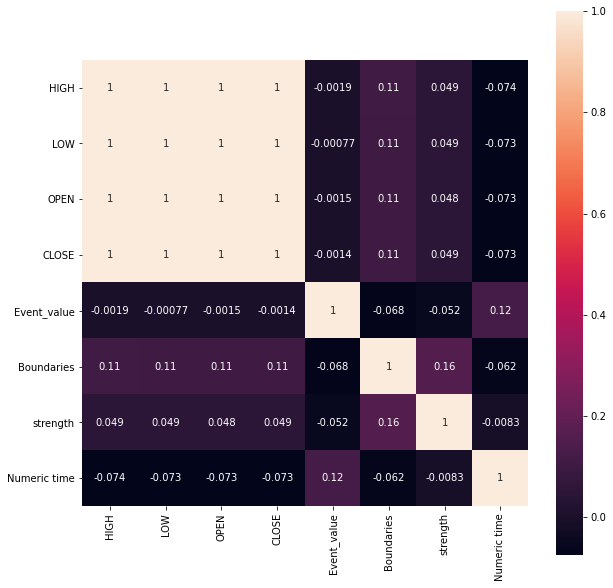

In [9]:
# plot the heatmap for visualize the correlation
fig, ax = plt.subplots(figsize=(10,10))
heatmap_1 = sns.heatmap(train_set.corr(),annot=True,square =True,ax=ax)
plt.savefig("figure 2.jpg")
print(heatmap_1)
nor = train_set[['HIGH','Event_value','Numeric time']]  # select only non-categorical columns to normalize 
nor


In [10]:
ms = MinMaxScaler().fit(nor) # create the min max scaleing object
scaled = ms.fit_transform(nor)#normalizing the columns
scaled = pd.DataFrame(scaled,columns = ['HIGH','Event_value','Numeric time'])
scaled 

,HIGH,Event_value,Numeric time
0,0.144962,0.506329,0.357895
1,0.137616,0.379747,0.947368
2,0.136426,0.398734,0.600000
3,0.135646,0.772152,0.357895
4,0.165521,0.405063,0.357895
...,...,...,...
1195,0.676960,0.588608,0.589474
1196,0.673841,0.367089,0.357895
1197,0.694462,0.392405,0.357895
1198,0.693703,0.354430,0.926316


event encoding order Index(['JPY_CPI', 'JPY_IR', 'JPY_UNEMP', 'USD_CPI', 'USD_GDP', 'USD_IR',
       'USD_PPI', 'USD_RETAIL'],
      dtype='object')


,HIGH,Event_value,Numeric time,JPY_CPI,JPY_IR,JPY_UNEMP,USD_CPI,USD_GDP,USD_IR,USD_PPI,USD_RETAIL
0,0.144962,0.506329,0.357895,0,0,0,0,0,0,1,0
1,0.137616,0.379747,0.947368,0,1,0,0,0,0,0,0
2,0.136426,0.398734,0.600000,0,0,0,0,0,1,0,0
3,0.135646,0.772152,0.357895,0,0,0,0,1,0,0,0
4,0.165521,0.405063,0.357895,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1195,0.676960,0.588608,0.589474,0,0,0,0,0,1,0,0
1196,0.673841,0.367089,0.357895,0,0,0,0,0,0,1,0
1197,0.694462,0.392405,0.357895,0,0,0,0,0,0,0,1
1198,0.693703,0.354430,0.926316,0,1,0,0,0,0,0,0


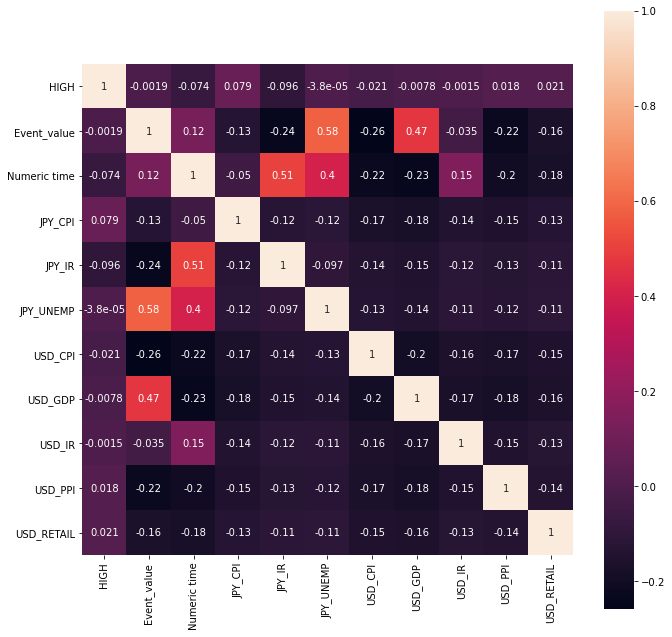

In [11]:
le = LabelEncoder() # label encoding object for trend and duration
dummies = pd.get_dummies(train_set['Event_type']) #encoding method for event type
encoding_event_order= (dummies.columns)
X = scaled.join(dummies)
y = le.fit_transform(train_set['Time duration'])#select the time duration as the target variable, named as y

fig, ax = plt.subplots(figsize=(11,11))
hmap_2 = sns.heatmap(X.corr(),annot=True,square =True,ax=ax)# heatmap for the correlation after including encoded categories
plt.savefig("figure 3.jpg")
 
print('event encoding order' , encoding_event_order) #event type encoding sequence

X


In [12]:
temp = train_set.groupby('Event_type')['strength'].mean()
temp_dict= dict(temp)
train_set['Event_type'] = train_set['Event_type'].apply(lambda x: temp_dict.get(x))
 
X_mod =  train_set[['HIGH','Event_value','Event_type','strength']]

In [13]:
X = X.drop(columns= ['JPY_UNEMP'], axis = 1)#drop the particular column because of the high correlation
X

,HIGH,Event_value,Numeric time,JPY_CPI,JPY_IR,USD_CPI,USD_GDP,USD_IR,USD_PPI,USD_RETAIL
0,0.144962,0.506329,0.357895,0,0,0,0,0,1,0
1,0.137616,0.379747,0.947368,0,1,0,0,0,0,0
2,0.136426,0.398734,0.600000,0,0,0,0,1,0,0
3,0.135646,0.772152,0.357895,0,0,0,1,0,0,0
4,0.165521,0.405063,0.357895,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1195,0.676960,0.588608,0.589474,0,0,0,0,1,0,0
1196,0.673841,0.367089,0.357895,0,0,0,0,0,1,0
1197,0.694462,0.392405,0.357895,0,0,0,0,0,0,1
1198,0.693703,0.354430,0.926316,0,1,0,0,0,0,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,random_state =79)#79:-0.87  83-->0.887

In [15]:
#predict time duration using random Forest
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #accuracy of the random forest classifier when using for time duration

Accuracy: 0.8791666666666667


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,random_state = 92)
#predict time duration using kNN classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [18]:
print("Accuracy of knn model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of knn model: 0.7541666666666667


In [19]:
#predict time duration using svm classification algorithm
s = svm.SVC(kernel ='poly', degree = 10)
s.fit(X_train,y_train)
y_pred = s.predict(X_test)
print("Accuracy of svm:",metrics.accuracy_score(y_test, y_pred))


Accuracy of svm: 0.7208333333333333


In [20]:
y= le.fit_transform(train_set['Trend']) #encoding the Trend column
y

array([1, 1, 1, ..., 0, 1, 0])

In [21]:
#predict trend using kNN classification
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy of knn:",metrics.accuracy_score(y_test, y_pred))


Accuracy of knn: 0.775


In [22]:
#predict trend using svm classification algorithm
s = svm.SVC(kernel ='poly', degree = 15) 
s.fit(X_train,y_train)
y_pred = s.predict(X_test)
print("Accuracy of svm:",metrics.accuracy_score(y_test, y_pred))


Accuracy of svm: 0.7541666666666667


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,random_state = 79)#splitting the train set -10
y_test_trend = y_test

#predict the trend using random Forest

clf=RandomForestClassifier(n_estimators=3)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred
print("Accuracy of random Forest:",metrics.accuracy_score(y_test, y_pred))

Accuracy of random Forest: 0.6833333333333333


In [24]:
#Experiment

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state = 42)#splitting the train set
y_test_trend = y_test
#predict the trend using random Forest
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred_rf=clf.predict(X_test)
print("Accuracy of random Forest:",metrics.accuracy_score(y_test, y_pred))

s = svm.SVC()
s.fit(X_train,y_train)
y_pred_svm = s.predict(X_test)
print("Accuracy of svm:",metrics.accuracy_score(y_test, y_pred))


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy of knn:",metrics.accuracy_score(y_test, y_pred))

Accuracy of random Forest: 0.3416666666666667
Accuracy of svm: 0.3416666666666667
Accuracy of knn: 0.3416666666666667


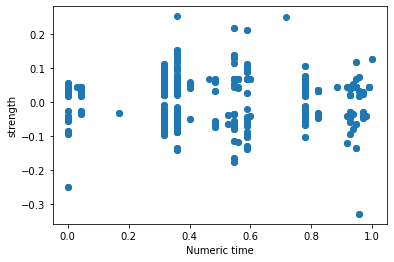

<Figure size 432x288 with 0 Axes>

In [26]:
# behaviour of event time vs. strength
y= train_set['strength']
plt.scatter(X['Numeric time'],y)
plt.xlabel('Numeric time')
plt.ylabel('strength')
plt.show()
plt.savefig("figure 4.jpg")


In [27]:
X_linear = train_set[['HIGH','Event_value','Event_type']]
X_linear['Event_type'] = le.fit_transform(X_linear['Event_type'])
X_linear.describe()


,HIGH,Event_value,Event_type
count,1200.000000,1200.000000,1200.000000
mean,103.420476,0.931125,3.660000
std,13.282351,1.245131,2.105888
min,75.776000,-2.900000,0.000000
25%,98.570000,0.100000,2.000000
50%,108.231000,0.300000,4.000000
75%,111.996000,1.525000,5.000000
max,124.513000,5.000000,7.000000


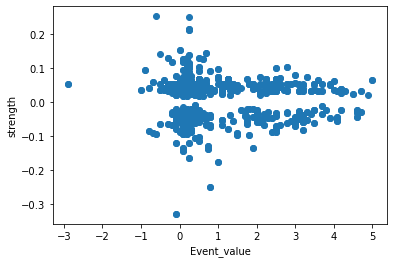

In [28]:
#identify the behavior of  Event value and strength
plt.scatter(X_linear['Event_value'],y)
plt.xlabel('Event_value')
plt.ylabel('strength')
plt.show()


In [29]:

y= train_set['strength'] #when trend is DOWn strength is minus. I got the abs value for having a good distribution. At the end again this will be converted to minus again
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2,random_state = 42)
regression_model = LinearRegression() # creating the linear regression model
regression_model.fit(X_train,y_train)
y_pred = regression_model.predict(X_test)

print('R^2:',metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 


X

R^2: -0.0143837072213302
Mean Absolute Error: 0.050633649947259475
Mean Squared Error: 0.0035003462946364716
Root Mean Squared Error: 0.059163724482460295


,HIGH,Event_value,Numeric time,JPY_CPI,JPY_IR,USD_CPI,USD_GDP,USD_IR,USD_PPI,USD_RETAIL
0,0.144962,0.506329,0.357895,0,0,0,0,0,1,0
1,0.137616,0.379747,0.947368,0,1,0,0,0,0,0
2,0.136426,0.398734,0.600000,0,0,0,0,1,0,0
3,0.135646,0.772152,0.357895,0,0,0,1,0,0,0
4,0.165521,0.405063,0.357895,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1195,0.676960,0.588608,0.589474,0,0,0,0,1,0,0
1196,0.673841,0.367089,0.357895,0,0,0,0,0,1,0
1197,0.694462,0.392405,0.357895,0,0,0,0,0,0,1
1198,0.693703,0.354430,0.926316,0,1,0,0,0,0,0


In [30]:
pd.DataFrame(y_pred) # this is predicted output for x_test

,0
0,0.012685
1,0.013248
2,-0.000567
3,0.009320
4,0.016653
...,...
235,0.021118
236,0.019523
237,0.020850
238,0.011369


In [31]:
y_test # this is the real output for x_test


1178    0.034474
865    -0.034545
101     0.022045
439     0.034474
58      0.067677
          ...   
382    -0.176273
867    -0.063091
542     0.056074
1193    0.024045
874    -0.056727
Name: strength, Length: 240, dtype: float64

# LINEAR REGRESSION MODEL 2

In [32]:

X = X_mod.drop(columns= 'strength')
y = X_mod['strength']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.5,random_state = 42)


regression_model.fit(X_train,y_train)
y_pred = regression_model.predict(X_test)

print('R^2:',metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
 


R^2: 0.008245381914486427
Mean Absolute Error: 0.050974028099351025
Mean Squared Error: 0.003779532677746274
Root Mean Squared Error: 0.06147790397977369


In [33]:
const = regression_model.intercept_
print('constant value :',const)
coef = regression_model.coef_
print('coefficient of indipendent variables :',coef)

constant value : -0.006678914124451669
coefficient of indipendent variables : [ 1.60862944e-04 -2.25101897e-03  4.36953876e-01]


In [34]:
#find the strength value when an event increased
def increasing_strength(HIGH,event_value,event_typep,): #p= increasing_percentage
    init_strength = coef[0]*HIGH+ coef[1]*event_value + coef[2]*event_type + const
    increased_strength = coef[0]*HIGH + coef[1]*(event_value + event_value*p) + coef[2]*event_type + const
    return increased_strength
    

In [35]:
print(pd.Series(temp_dict))


JPY_CPI       0.008011
JPY_IR        0.006347
JPY_UNEMP     0.006392
USD_CPI       0.016175
USD_GDP       0.009623
USD_IR        0.017613
USD_PPI       0.012386
USD_RETAIL    0.019587
dtype: float64


# combining accuracy for trend

In [36]:
trend_pred = []
for i in range(240):
    if [i] ==y_test_trend[i] or y_pred_rf[i] ==y_test_trend[i] or y_pred_svm[i] ==y_test_trend[i]:
        trend_pred.append(y_test_trend[i])
    else:
        trend_pred.append(y_pred_svm[i])

print("Accuracy of the combining model:",metrics.accuracy_score(y_test_trend, trend_pred))
    

Accuracy of the combining model: 0.9
